<a href="https://colab.research.google.com/github/jimstigler/jupyter/blob/master/Copy_of_IR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cat(system('python3 -c "from google.colab import drive\ndrive.mount()"', intern=TRUE), sep='\n', wait=TRUE)

Warning message in system("python3 -c \"from google.colab import drive\ndrive.mount()\"", :
“running command 'python3 -c "from google.colab import drive
drive.mount()"' had status 1”



TRUE


In [0]:
?system

In [4]:
install.packages("rgl", repos = "http://cran.rstudio.com/")
install.packages("ConsRank", repos = "http://cran.rstudio.com/")
library("ConsRank")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miniUI’, ‘webshot’, ‘manipulateWidget’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘data.table’, ‘rlist’, ‘proxy’, ‘gtools’


Loading required package: rgl

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”

Attaching package: ‘ConsRank’


The following object is masked from ‘package:base’:

    labels




In [0]:
system("add-apt-repository -y ppa:marutter/rrutter")
system("add-apt-repository -y ppa:marutter/c2d4u")
system("apt-get update")
system("apt install -y r-cran-rstan")

In [6]:
install.packages('ggmap')
install.packages('codetools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RgoogleMaps’, ‘png’, ‘rjson’, ‘jpeg’, ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library("ggmap")

Loading required package: ggplot2

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



In [8]:
options(repr.plot.width  = 3,
        repr.plot.height = 3)
Sys.setenv(USE_CXX14 = 1)
library("rstan") # observe startup messages
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

Loading required package: StanHeaders

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



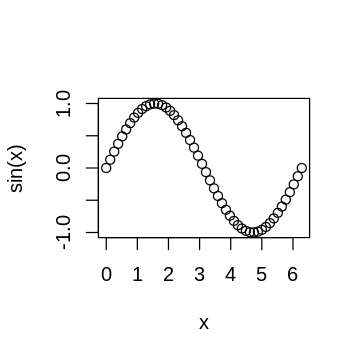

In [9]:
x <- seq(0, 2*pi, length.out=50)
plot(x, sin(x))

In [10]:
stanmodelcode <- "
data {
    int<lower=0> N; 
    real y[N];
}

parameters {
    real mu; 

}

model {
    target += normal_lpdf(mu | 0, 10);
    target += normal_lpdf(y | mu, 1);
}"

y <- rnorm(20)
dat <- list(N = 20, y = y);

fit <- stan(model_code = stanmodelcode, model_name = "example",
            data = dat, iter = 2012, chains = 8, sample_file = 'norm.csv',
            verbose = FALSE,
            refresh = -1)

print(fit)

Inference for Stan model: example.
8 chains, each with iter=2012; warmup=1006; thin=1; 
post-warmup draws per chain=1006, total post-warmup draws=8048.

       mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
mu     0.56    0.00 0.22   0.13   0.41   0.56   0.70   0.99  3002    1
lp__ -31.76    0.01 0.68 -33.76 -31.91 -31.50 -31.33 -31.28  3540    1

Samples were drawn using NUTS(diag_e) at Sun Dec 29 00:51:27 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



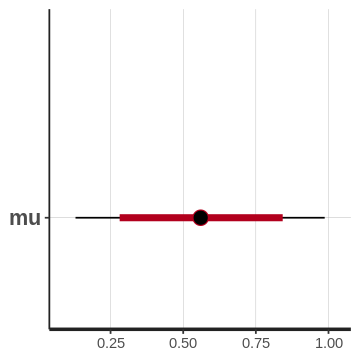

In [11]:
plot(fit)

In [12]:
y <- as.matrix(read.table('https://raw.github.com/wiki/stan-dev/rstan/rats.txt', header = TRUE))
x <- c(8, 15, 22, 29, 36)
xbar <- mean(x)
N <- nrow(y)
T <- ncol(y)
rats_fit <- stan(file = 'https://raw.githubusercontent.com/stan-dev/example-models/master/bugs_examples/vol1/rats/rats.stan')


Warning message in normalizePath(file):
“path[1]="https://raw.githubusercontent.com/stan-dev/example-models/master/bugs_examples/vol1/rats/rats.stan": No such file or directory”


DIAGNOSTIC(S) FROM PARSER:
Info: Comments beginning with # are deprecated.  Please use // in place of # for line comments.
Info: Comments beginning with # are deprecated.  Please use // in place of # for line comments.
Info: Comments beginning with # are deprecated.  Please use // in place of # for line comments.
Info: Comments beginning with # are deprecated.  Please use // in place of # for line comments.
Info: assignment operator <- deprecated in the Stan language; use = instead.
Info: assignment operator <- deprecated in the Stan language; use = instead.
Info: assignment operator <- deprecated in the Stan language; use = instead.
Info: assignment operator <- deprecated in the Stan language; use = instead.



In [13]:
rats_fit

Inference for Stan model: rats.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                 mean se_mean    sd    2.5%     25%     50%     75%   97.5%
alpha[1]       239.96    0.04  2.65  234.70  238.18  239.95  241.73  245.13
alpha[2]       247.81    0.04  2.78  242.34  246.04  247.79  249.60  253.35
alpha[3]       252.44    0.04  2.72  247.11  250.59  252.40  254.26  257.82
alpha[4]       232.63    0.04  2.76  227.20  230.74  232.65  234.47  238.07
alpha[5]       231.67    0.04  2.70  226.34  229.84  231.67  233.49  237.01
alpha[6]       249.71    0.04  2.65  244.52  247.90  249.78  251.52  254.88
alpha[7]       228.75    0.04  2.70  223.34  226.99  228.76  230.53  234.04
alpha[8]       248.42    0.04  2.71  243.26  246.67  248.43  250.17  253.79
alpha[9]       283.30    0.04  2.68  277.91  281.55  283.35  285.07  288.49
alpha[10]      219.25    0.04  2.73  213.89  217.49  219.29  221.00  224.70
alpha[11]     

'pars' not specified. Showing first 10 parameters by default.

ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



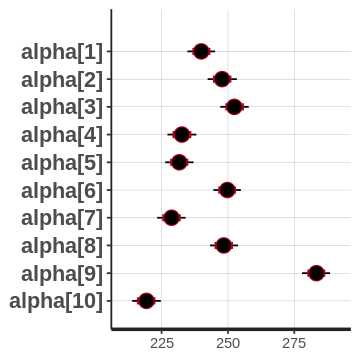

In [14]:
plot(rats_fit)

In [15]:
## load APA data set, full version
data(APAFULL)
## Emond and Mason Branch-and-Bound algorithm.
## If the number of object is higher than 20, EMCons function may work for several minutes.
## Use either QuickCons, DECOR, FASTcons or FASTDECOR instead
CR=EMCons(APAFULL)

Warning message:
“'EMCons' will be removed in the next release of the package”


[1] "round 1"
[1] "evaluating 1 branches"
[1] "evaluating 1 branches"
[1] "evaluating 1 branches"
[1] "evaluating 1 branches"


In [17]:
TR=tabulaterows(APAFULL)
CR2=FASTcons(TR$X,TR$Wk,maxiter=5)
CR3=QuickCons(TR$X,TR$Wk)
CR4=DECOR(TR$X,TR$Wk)
#####################################
### load sports data set
#data(sports)
### FAST algorithm
#CR=FASTcons(sports,maxiter=10)
#####################################
#######################################
### load Emond and Mason data set
#data(EMD)
### matrix X contains rankings
#X=EMD[,1:15]
### vector Wk contains frequencies
#Wk=EMD[,16]
### QUICK algorithm
#CR=QuickCons(X,Wk)
#######################################

Warning message:
“'FASTcons' will be removed in the release of the package”
Warning message:
“'QuickCons' will be removed in the next release of the package”


ERROR: ignored

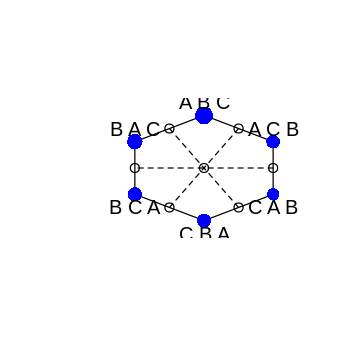

In [18]:
data(BU)
polyplot(BU[,1:3],Wk=BU[,4])

In [23]:
install.packages("supernova")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library(supernova)

In [25]:
str(Fingers)

'data.frame':	157 obs. of  16 variables:
 $ Sex          : Factor w/ 2 levels "female","male": 2 1 1 2 1 1 2 1 1 1 ...
 $ RaceEthnic   : Factor w/ 5 levels "White","African American",..: 3 3 4 3 3 1 3 4 3 3 ...
 $ FamilyMembers: int  7 5 2 4 3 8 2 6 4 1 ...
 $ SSLast       : num  NA 7 2 9 8 7 3 0 3 NA ...
 $ Year         : Factor w/ 4 levels "1","2","3","4": 3 2 2 2 3 3 2 2 2 1 ...
 $ Job          : Factor w/ 3 levels "Not Working",..: 1 1 2 2 2 2 2 2 1 1 ...
 $ MathAnxious  : Factor w/ 5 levels "Strongly Disagree",..: 4 4 2 5 3 5 2 5 3 2 ...
 $ Interest     : Factor w/ 3 levels "No Interest",..: 1 2 3 3 2 1 3 3 2 2 ...
 $ GradePredict : num  3.3 3.7 3.3 4 3.7 4 4 3.7 4 4 ...
 $ Thumb        : num  66 64 56 58.4 74 ...
 $ Index        : num  79 73 69 76.2 79 64 80 62 74 66 ...
 $ Middle       : num  84 80 76 91.4 83 70 90 75 78 74 ...
 $ Ring         : num  74 75 71 76.2 76 65 70 70 73 70 ...
 $ Pinkie       : num  57 62 54 63.5 64 58 65 54 57 53 ...
 $ Height       : num  70.5 64.8 64